# Differences over $\alpha$

How do our allocations change over different $\alpha$?


In [1]:
import sys

# add library to path (or else, src not visible)
sys.path.insert(0, "../../")

import matplotlib.pyplot as plt
import numpy as np

from src.AllocationSolver import AllocationSolver, social_welfare_absolute, social_welfare_relative
from src.dists import SymmetricDiscreteDistribution, Distribution, UniformDistribution

In [2]:
alpha_0 = social_welfare_absolute(0)
alpha_1 = social_welfare_absolute(1)
alpha_inf = social_welfare_absolute(np.inf)

alpha_0_rel = social_welfare_relative(0)
alpha_1_rel = social_welfare_relative(1)
alpha_inf_rel = social_welfare_relative(np.inf)

We now try varying $d_i$.

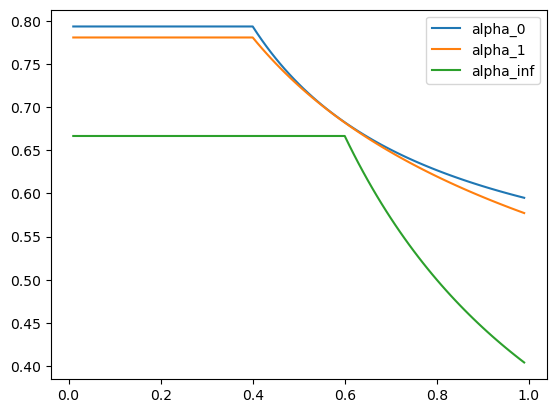

In [3]:
d_1 = np.arange(0.01, 1, 0.01)
d_2 = 0.7
d_3 = 0.6
x_1 = 0.4
x_2 = 0.5
x_3 = 0.4

a_0 = np.zeros_like(d_1)
a_1 = np.zeros_like(d_1)
a_inf = np.zeros_like(d_1)

for i, d_1_val in enumerate(d_1):
    allocs = [min(d_1_val, x_1), min(d_2, x_2), min(d_3, x_3)]
    demands = [d_1_val, d_2, d_3]
    a_0[i] = alpha_0(allocs, demands)
    a_1[i] = alpha_1(allocs, demands)
    a_inf[i] = alpha_inf(allocs, demands)

plt.plot(d_1, a_0, label="alpha_0")
plt.plot(d_1, a_1, label="alpha_1")
plt.plot(d_1, a_inf, label="alpha_inf")
plt.legend()

We now try varying $x_1$.

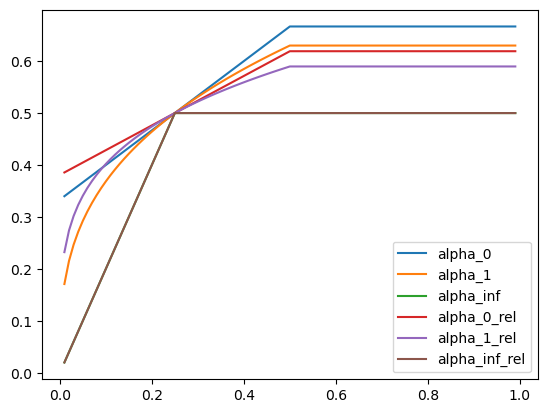

In [4]:
d_1 = 0.5
d_2 = 0.7
d_3 = 0.9
x_1 = np.arange(0.01, 1, 0.01)
x_2 = 0.35
x_3 = 0.45

a_0 = np.zeros_like(x_1)
a_1 = np.zeros_like(x_1)
a_inf = np.zeros_like(x_1)

a_0_rel = np.zeros_like(x_1)
a_1_rel = np.zeros_like(x_1)
a_inf_rel = np.zeros_like(x_1)

for i, x_1_val in enumerate(x_1):
    allocs = [min(d_1, x_1_val), min(d_2, x_2), min(d_3, x_3)]
    demands = [d_1, d_2, d_3]
    a_0[i] = alpha_0(allocs, demands)
    a_1[i] = alpha_1(allocs, demands)
    a_inf[i] = alpha_inf(allocs, demands)
    a_0_rel[i] = alpha_0_rel(allocs, demands)
    a_1_rel[i] = alpha_1_rel(allocs, demands)
    a_inf_rel[i] = alpha_inf_rel(allocs, demands)

plt.plot(x_1, a_0, label="alpha_0")
plt.plot(x_1, a_1, label="alpha_1")
plt.plot(x_1, a_inf, label="alpha_inf")
plt.plot(x_1, a_0_rel, label="alpha_0_rel")
plt.plot(x_1, a_1_rel, label="alpha_1_rel")
plt.plot(x_1, a_inf_rel, label="alpha_inf_rel")
plt.legend()

In [5]:
prob = AllocationSolver([Distribution((1, 2), (0.5, 0.5)),
                         Distribution((2, 4), (0.5, 0.5))],
                         3,
                         equity="absolute",
                         alloc_step=0.001,
                         alpha=1,
                         verbosity=2)
prob.solve()

At time 2 with d_t=2 and c_t=2.0, allocate what's left with Z=1.0 and waste=0.0.
At time 2 with d_t=4 and c_t=2.0, allocate what's left with Z=0.71 and waste=0.
At time 1 with d_t=1 and c_t=3, we allocate x_t=1.0.
At time 2 with d_t=2 and c_t=1.5, allocate what's left with Z=0.75 and waste=0.
At time 2 with d_t=4 and c_t=1.5, allocate what's left with Z=0.53 and waste=0.
At time 1 with d_t=2 and c_t=3, we allocate x_t=1.5.


array([0.74685922, 0.        ])